In [1]:
import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
import torchaudio

import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import librosa.display

from omegaconf import OmegaConf

from inference_utils import Inference
from common_utils import AudioToMelPipe

import glob
import numpy as np

import matplotlib.pyplot as plt

def show_audio(audio_path):
    pipe = AudioToMelPipe(random_split=False)
    melspectrogram = pipe.load_audio(audio_path, target_frame_length=None)
#     display(librosa.display.specshow(melspectrogram[0].numpy(), sr=16000, hop_length=256, fmin=10., x_axis='time', y_axis='mel', cmap='magma'))

    y, sr = librosa.load(audio_path, sr=16000)

    plt.close
    plt.figure(figsize=(12,4))
    plt.plot(np.arange(len(y)), y)
    plt.figure(figsize=(12,4))
    plt.imshow(np.log10(melspectrogram[0].numpy()+10e-3), interpolation='nearest',  origin='lower')

    display(ipd.Audio(audio_path))

# Initialize Module

In [16]:
config = OmegaConf.load("config.yaml")
checkpoint_path = "lightning_logs/version_0/checkpoints/model-epoch=0072-val_f1=0.872.ckpt"
inference = Inference(checkpoint_path, config)
print(OmegaConf.to_yaml(config))

dataset:
  path: ../data_segments/
pipe:
  n_fft: 2048
  hop_length: 256
  sample_rate: 16000
  target_frame_length: 64
  n_mels: 128
  min_audio_sample_length: 16384
training:
  batch_size: 128
  num_workers: 8
  max_epochs: 100
  log_every_n_steps: 5
  learning_rate: 0.001



# Select Target Audio

In [3]:
test_audios = sorted(glob.glob("../data_segments/test/**/**.wav"))
print(f'a total of {len(test_audios)} segments')
# print(np.array(test_audios)[10:20])

a total of 400 segments


In [13]:
index_test = 333

audio_path = test_audios[index_test]
print(f'test audio: {test_audios[index_test]}')
# audio_path = "segment_samples/val/A_2_01/S-210810_A_201_D_0001_0.wav"

test audio: ../data_segments/test/W_1_03/S-210909_W_103_D_001_0020_2.wav


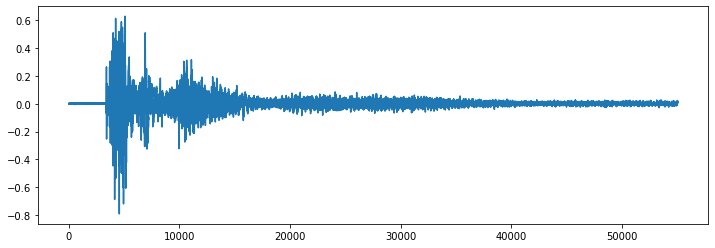

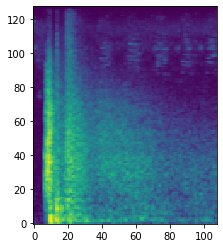

In [14]:
# audio_path="/workspace/nia/data_midterm/Label_0910_01/S-210908_W_102_D_021_0070.mp3"
show_audio(audio_path)

# Inference Result

In [15]:
inference.inference_audio(audio_path)

('W_1_03', 0.99857974)